# Map of sub-domain of ANHA12

In [2]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle

%matplotlib inline

#### Parameters:

In [3]:
# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179

isize = imax-imin
jsize = jmax-jmin

# Resolution of grid cells to show in figure:
grid_reso = 10

# Boundary coordinates: (i1,i2,j1,j2)
bdy_NCB = (1600,imax,jmax,jmax) # Northern Canada Basin
bdy_WCB = (imax,imax,391,jmax)  # Western Canada Basin
bdy_BB  = (imin,imin,449,674)   # Baffin Bay
bdy_HB  = (1189,1474,291,291)   # Hudson Bay

#### Load files:

In [4]:
mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
hdept = np.array(mesh.variables['hdept'][0])

mask         = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon     = np.array(mask.variables['nav_lon'])
mesh_lat     = np.array(mask.variables['nav_lat'])
mesh_bathy   = np.array(mask.variables['tmask'][0,:,:,:])
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
ocean_masked = np.ma.masked_where((mesh_bathy<0.1), mesh_bathy)
depths       = np.array(mask.variables['nav_lev'])

#### Figure:

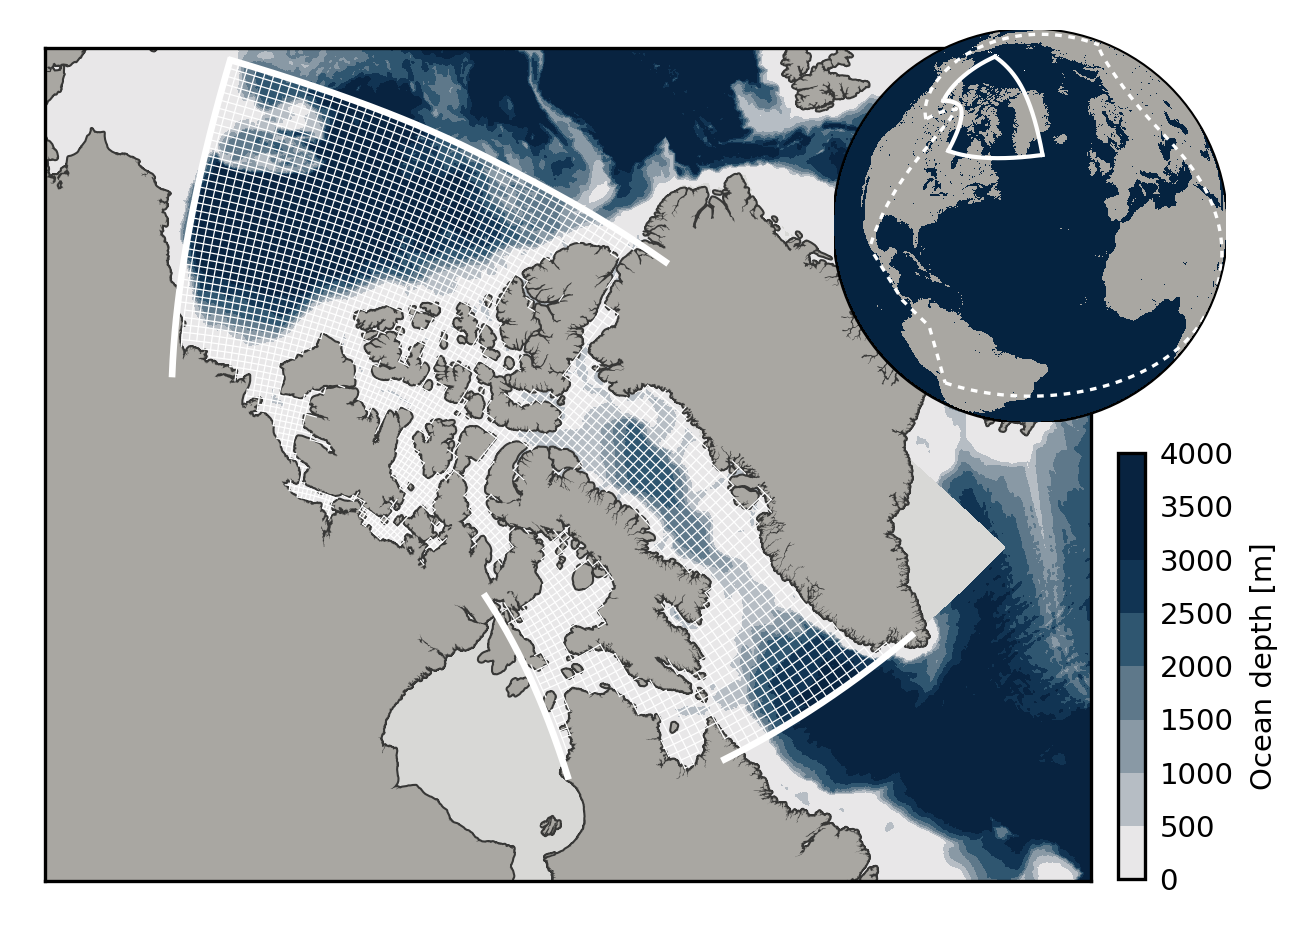

In [5]:
fig, ax1, proj1, ax2, proj2 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb-map-globe.pickle','rb'))

# Globe: --------------------------------------------------------------------------------------
x, y  = proj2(mesh_lon, mesh_lat) 

# Sub-domain
proj2.plot(x[imin:imax,jmin], y[imin:imax,jmin], 'w-', lw=1, zorder=3)
proj2.plot(x[imin:imax,jmax], y[imin:imax,jmax], 'w-', lw=1, zorder=3)
proj2.plot(x[imin,jmin:jmax], y[imin,jmin:jmax], 'w-', lw=1, zorder=3)
proj2.plot(x[imax,jmin:jmax], y[imax,jmin:jmax], 'w-', lw=1, zorder=3)
# full domain
proj2.plot(x[460:-1:grid_reso,0]  , y[460:-1:grid_reso,0]  , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
proj2.plot(x[0,370:-1:grid_reso]  , y[0,370:-1:grid_reso]  , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
proj2.plot(x[100:-1:grid_reso,-1] , y[100:-1:grid_reso,-1] , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
proj2.plot(x[-1,0:-1:grid_reso]   , y[-1,0:-1:grid_reso]   , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
xline_add = [x[500,0], x[700,70], x[1100,0], x[0,370]]
yline_add = [y[240,-1], y[85,-80], y[80,0], y[0,370]]
proj2.plot(xline_add, yline_add, 'w--', lw=0.8, zorder=3, dashes=(2, 2))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 

# masked areas
bath = proj1.contourf(x_sub, y_sub, hdept, 20, cmap=cmocean.cm.diff_r, vmin=-3000, vmax=3000, \
                      levels=[0,500,1000,1500,2000,2500,3000,3500,4000], zorder=1)
proj1.contourf(x_sub, y_sub, bathy_masked[0,:,:], colors=['#d8d8d6'], zorder=1) # land mask

# grid:
x_grid_plot = np.ma.masked_where((mesh_bathy[0,:,:] < 0.1), x_sub)
y_grid_plot = np.ma.masked_where((mesh_bathy[0,:,:] < 0.1), y_sub)
proj1.plot(x_grid_plot[imin:imax+grid_reso:grid_reso,jmin:jmax+grid_reso:grid_reso]  , \
           y_grid_plot[imin:imax+grid_reso:grid_reso,jmin:jmax+grid_reso:grid_reso]  , 'w-', lw=0.3, zorder=4);
proj1.plot(x_grid_plot[imin:imax+grid_reso:grid_reso,jmin:jmax+grid_reso:grid_reso].T, \
           y_grid_plot[imin:imax+grid_reso:grid_reso,jmin:jmax+grid_reso:grid_reso].T, 'w-', lw=0.3, zorder=4);

# Domain boundaries: 
proj1.plot(x_sub[bdy_BB[0],bdy_BB[2]:bdy_BB[3]], y_sub[bdy_BB[0],bdy_BB[2]:bdy_BB[3]], '-', c='w', lw=1.6, zorder=3);
proj1.plot(x_sub[bdy_WCB[0],bdy_WCB[2]:bdy_WCB[3]], y_sub[bdy_WCB[0],bdy_WCB[2]:bdy_WCB[3]], '-', c='w', lw=1.6, zorder=3); 
proj1.plot(x_sub[bdy_NCB[0]:bdy_NCB[1],bdy_NCB[2]], y_sub[bdy_NCB[0]:bdy_NCB[1],bdy_NCB[2]], '-', c='w', lw=1.6, zorder=3); 
proj1.plot(x_sub[bdy_HB[0]:bdy_HB[1],bdy_HB[2]], y_sub[bdy_HB[0]:bdy_HB[1],bdy_HB[2]], '-', c='w', lw=1.6, zorder=3); 

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.92, 0.133, 0.02, 0.38]);
CBar   = plt.colorbar(bath, ax=ax1, cax=cbaxes, ticks=[0,500,1000,1500,2000,2500,3000,3500,4000]); 
CBar.set_label('Ocean depth [m]', fontsize=7)
CBar.ax.tick_params(axis='y', length=0, labelsize=7)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/Pb_chapter/M1-sub-domain.png', bbox_inches='tight', dpi=300)